In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(X_train, y_train), (X_test, y_test) =  mnist.load_data()

In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


training data = 60,000 images, 28 pixels height, 28 pixels width

grayscaled images, meaning only one color
only 1 channel

In [4]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

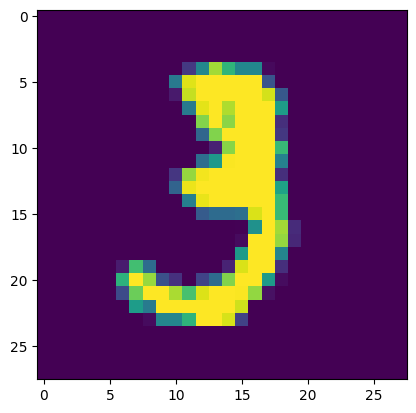

In [5]:
plt.imshow(X_train[10])

In [6]:
X_train[10].shape

(28, 28)

In [7]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [8]:
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]


Using one hot encoding for the y values

In [9]:
#scaling the values
X_train = X_train/255
X_test = X_test/255

Only the range of the image is changed, the image is not changed

In [10]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

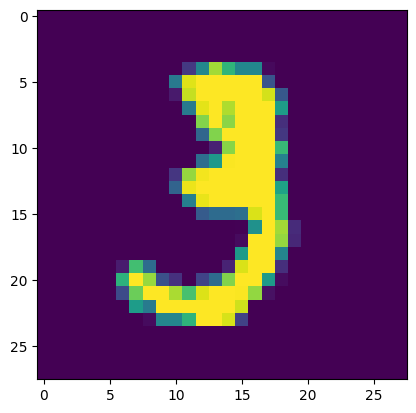

In [11]:
plt.imshow(X_train[10])

Building Neural Networks

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(50, activation= 'relu'),
    keras.layers.Dense(50, activation= 'relu'),
    keras.layers.Dense(10, activation= 'sigmoid') #because total number of outputs is 10

])
    

/Users/apurbakoirala/anaconda3/envs/myenv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
#training the neural network
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 327us/step - accuracy: 0.8469 - loss: 0.5247
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 320us/step - accuracy: 0.9559 - loss: 0.1459
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 313us/step - accuracy: 0.9687 - loss: 0.1046
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 320us/step - accuracy: 0.9753 - loss: 0.0814
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 320us/step - accuracy: 0.9803 - loss: 0.0669
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 319us/step - accuracy: 0.9834 - loss: 0.0556
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 320us/step - accuracy: 0.9868 - loss: 0.0465
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 369us/step - accuracy: 0.9879 - loss: 0.0409
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 345us/step - accuracy: 0.9893 - loss: 0.0360
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 351us/step - accuracy: 0.9908 - loss: 0.0306


In [15]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - accuracy: 0.9679 - loss: 0.1254


In [16]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step


In [17]:
print(Y_pred[0]) #the values given are what are the probabilities of each class for an input here, 7 has 0.99

[6.4887005e-05 1.8256209e-03 3.8831035e-04 5.4366857e-01 5.7195418e-08
 8.8278234e-02 1.4191734e-08 9.9999321e-01 2.8874438e-05 9.0610391e-01]


In [18]:
label_for_first_test_image = np.argmax(Y_pred[0])

In [19]:
label_for_first_test_image

7

In [20]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]

In [21]:
print(Y_pred_labels) #prediction for each X_test

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [22]:
cm = confusion_matrix(y_test, Y_pred_labels)

In [23]:
print(cm)

tf.Tensor(
[[ 955    0    2    1    6    1    0    0    3   12]
 [   0 1122    1    3    0    0    2    2    5    0]
 [   3    1  994   18    2    0    1    2   11    0]
 [   0    0    4  992    0    1    0    0    4    9]
 [   0    1    4    1  957    0    1    4    0   14]
 [   2    0    0   20    0  854    7    1    4    4]
 [   4    2    3    1    6    4  934    0    4    0]
 [   0    4   13    8    2    0    0  983    2   16]
 [   4    0    3   12    3    2    2    2  937    9]
 [   2    2    1    7   10    3    0    4    2  978]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

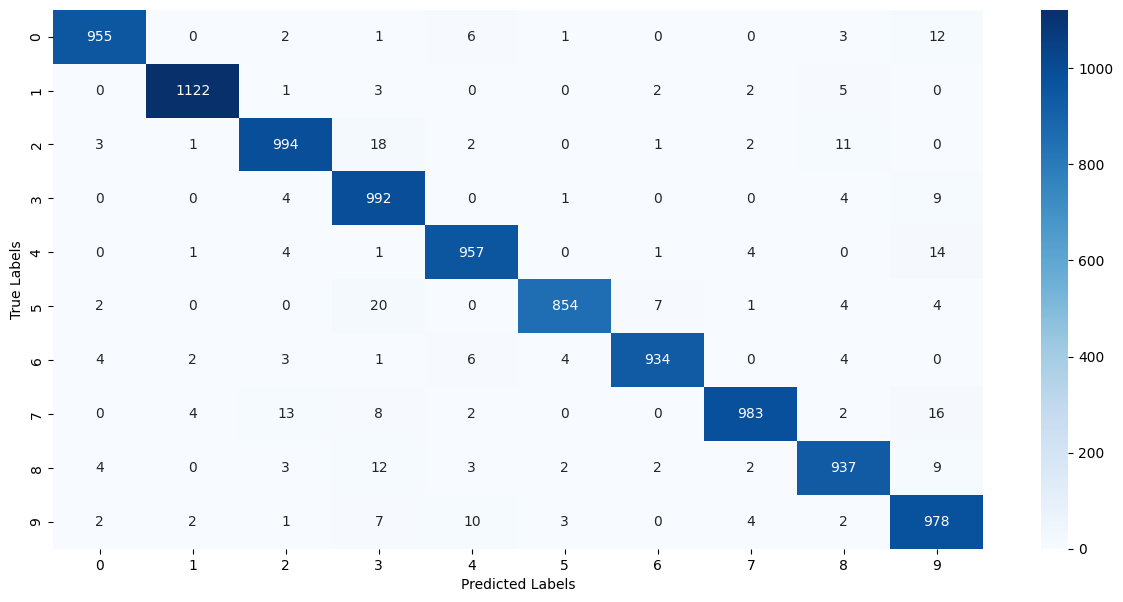

In [24]:
plt.figure(figsize=(15,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

# Building a predictive system

In [25]:
input_image_path = './MNIST_digit.png'

input_image = cv2.imread(input_image_path)

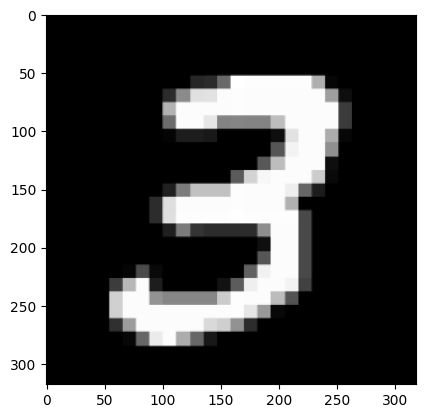

In [26]:
plt.imshow(input_image)

In [27]:
input_image.shape

(318, 318, 3)

In [28]:
greyscaled_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [29]:
print(greyscaled_image)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


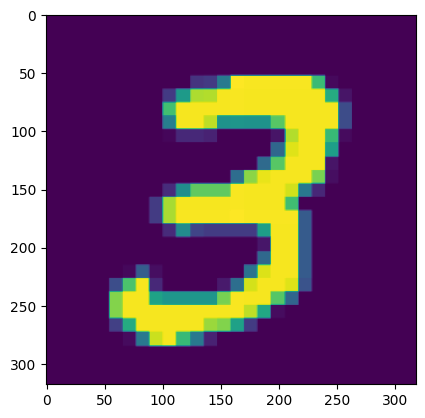

In [30]:
plt.imshow(greyscaled_image)

In [31]:
greyscaled_image.shape

(318, 318)

In [32]:
greyscaled_image_resize = cv2.resize(greyscaled_image, (28, 28))

In [33]:
greyscaled_image_resize.shape

(28, 28)

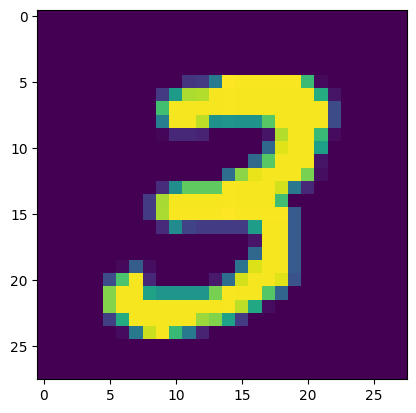

In [34]:
plt.imshow(greyscaled_image_resize)

In [35]:
greyscaled_image_resize = greyscaled_image_resize/255 #scaling

In [36]:
image_reshaped = np.reshape(greyscaled_image_resize, [1,28,28]) #predict value for only 1 image and the dimension is 28,28

In [37]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[[2.66945026e-08 1.16801839e-05 4.12877323e-03 1.00000000e+00
  1.05194385e-16 2.16523092e-02 5.16566013e-22 1.32941489e-06
  6.64143488e-02 9.99219596e-01]]


In [38]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3


# Predictive System

Path of the image to be predicted:  ./MNIST_digit.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
The Handwritten Digit is recognised as  3


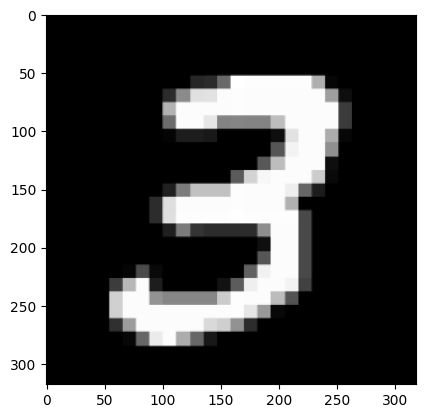

In [39]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)